In [ ]:
## Dependencies
from NanTex_backend.data_postprocessing.oneiros import Oneiros

In [29]:
# set up the dreamer
Dreamer = Oneiros.with_ground_truth(data_type = 'npy',
                                    DEBUG=False)

In [30]:
# Quickstart model
# Just choose the torch checkpoint file and the model will be loaded
Dreamer.quickstart_model()

In [31]:
Dreamer.dream()

Dreaming of nature...:   0%|          | 0/1 [00:00<?, ?it/s]

Dream_0...:   0%|          | 0/225 [00:00<?, ?it/s]

In [5]:
## Get an overview of the metaparameters
from pprint import pprint
pprint(Dreamer.metadata)

{'append_dream_overlays': True,
 'append_original_features': True,
 'append_original_overlays': True,
 'apply_dynamic_thresholds': True,
 'apply_static_thresholds': True,
 'cast_all_to_img': True,
 'dream_memory_shape': {'dream_0': (225, 3, 256, 256)},
 'dynamic_thresholds': {'auto_calculate': True,
                        'lower': -2,
                        'std_factor': 2,
                        'upper': 3},
 'feature_static_threshodls': {'feature_0': 0.1,
                               'feature_1': 0.1,
                               'feature_2': 0.1},
 'normalize': False,
 'out_type': <class 'numpy.uint8'>,
 'patch_array_shape': {'dream_0': (15, 15)},
 'patch_size': (256, 256),
 'standardize': True,
 'tensortype': torch.float32,
 'weights_only': True}


In [6]:
## Play with the static thresholds to delete background noise
Dreamer.metadata['feature_static_threshodls'].update({
    'feature_1': 0.0,
    'feature_2': 0.0,
    'feature_3': 0.0,
})
# Play with the dynamic thresholds to delete structural noise
Dreamer.metadata['dynamic_thresholds'].update({
    'auto_calculate': False,
    'upper': 3,
    'lower': -2,
    'std_factor':2
})

# Play with the dreamer parameters
Dreamer.metadata['apply_dynamic_thresholds'] = True
Dreamer.metadata['apply_static_thresholds'] = True

# choose what extras to export
Dreamer.metadata['append_dream_overlays'] = True
Dreamer.metadata['append_original_overlays'] = True
Dreamer.metadata['append_original_features'] = True

Dreamer.metadata['cast_all_to_img'] = True # if you dont want to export straight to image

# however, you have to re-run the post-processing
Dreamer.__post_process_data__()

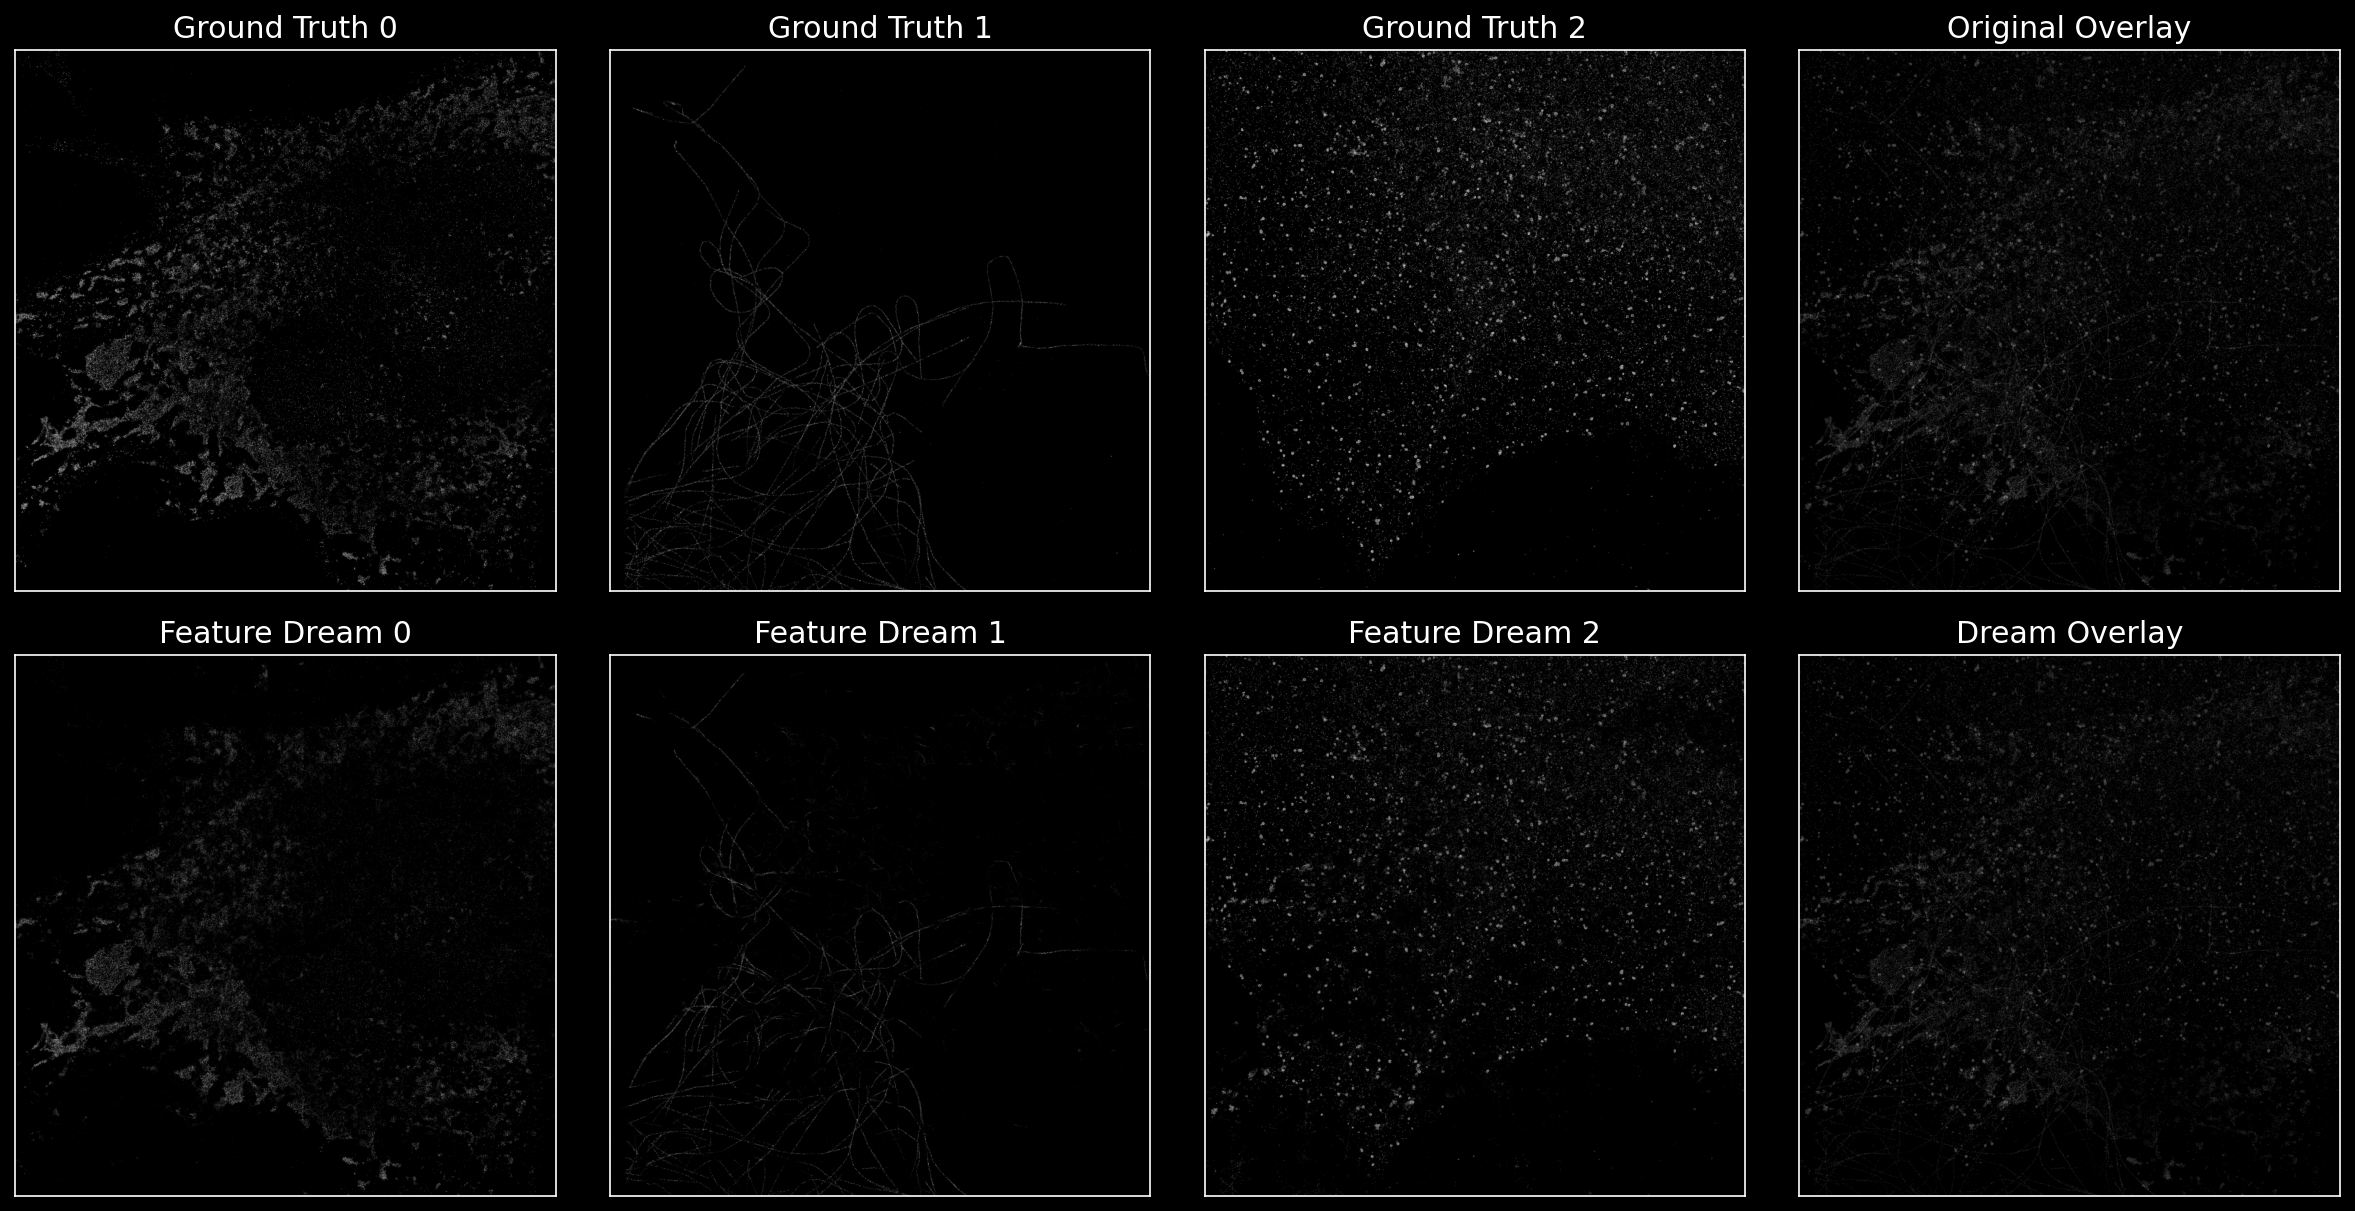

In [7]:
## Plot and vsualize the results
from NanTex_backend.Util.pltStyler import pltStyler
pltStyler().enforece_stylesheet()
Dreamer.visualize(dream_no = 0,
                  return_fig_axs=False)

In [8]:
## Export the results
Dreamer.export(out_type='png') # png <- image, npy <- numpy array, if you want mire, you need to implement it

## Deeper insights and step by step execution

In [9]:
## Test Pre-Processing
Dreamer.__pre_process_data__()

In [ ]:
## Dependencies
from NanTex_backend.deep_learning.dl_model_assembly import assembled_model, final_layer_config

## Load model
Dreamer.setup_model(model=assembled_model['model'],
                    activation=assembled_model['activation'],
                    device=assembled_model['device'],
                    state_dict_path=None)
Dreamer.load_weights(None)

To load pre-trained weights, call the 'load_weights' method.


In [12]:
Dreamer.__offload_data_to_device__()

In [13]:
Dreamer.metadata

{'feature_static_threshodls': {'feature_0': 0.1,
  'feature_1': 0.0,
  'feature_2': 0.0,
  'feature_3': 0.0},
 'dynamic_thresholds': {'auto_calculate': False,
  'upper': 3,
  'lower': -2,
  'std_factor': 2},
 'patch_size': (256, 256),
 'dream_memory_shape': {'dream_0': (225, 3, 256, 256)},
 'patch_array_shape': {'dream_0': (15, 15)},
 'standardize': True,
 'normalize': False,
 'tensortype': torch.float32,
 'out_type': numpy.uint8,
 'weights_only': True,
 'cast_all_to_img': True,
 'append_original_features': True,
 'append_original_overlays': True,
 'append_dream_overlays': True,
 'apply_static_thresholds': True,
 'apply_dynamic_thresholds': True}

In [14]:
Dreamer.__go_to_sleep__()

Dreaming of nature...:   0%|          | 0/1 [00:00<?, ?it/s]

Dream_0...:   0%|          | 0/225 [00:00<?, ?it/s]

In [15]:
Dreamer.__post_process_data__()

Text(0.5, 1.0, 'Original')

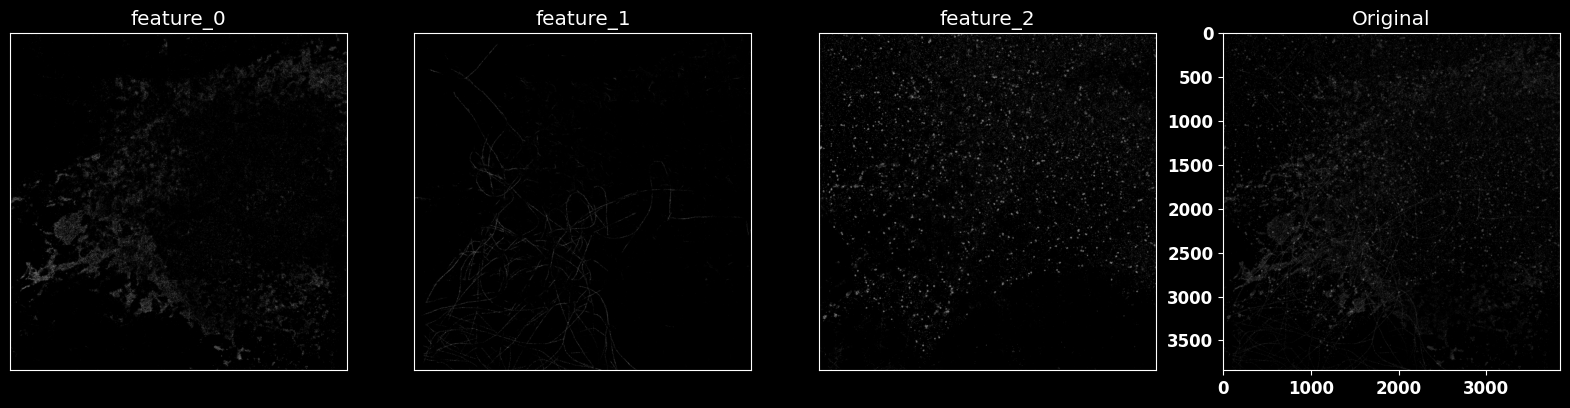

In [ ]:
## Visualization

import numpy as np
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Dependencies
from NanTex_backend.Util.pltStyler import pltStyler
import matplotlib.pyplot as plt

# control
Select_Dream:int = 0

# layout
pltStyler().enforece_stylesheet()

# figure
fig, axs = plt.subplots(1, final_layer_config['out_channels'] + 1, figsize=(5*(final_layer_config['out_channels'] + 1), 5))

# plot features
for i, key in enumerate(Dreamer.data_out[f"dream_{Select_Dream}"].keys()):
    if key in ['original_overlay', 'dream_overlay'] + [f'original_feature_{i}' for i in range(1, 4)]:
        continue
    
    axs[i].imshow(normalize(Dreamer.data_out[f"dream_{Select_Dream}"][key]) * 255, cmap='gray')
    axs[i].set_title(f"{key}")
    axs[i].tick_params(axis='both', 
                       which='both', 
                       bottom=False, 
                       top=False, 
                       left=False, 
                       right=False, 
                       labelbottom=False, 
                       labelleft=False)
    
# add original
axs[-1].imshow(normalize(Dreamer.data_out[f"dream_{Select_Dream}"]['original_overlay']) * 255, cmap='gray')
axs[-1].set_title('Original')